<a href="https://colab.research.google.com/github/romanowiczadam/data-sb/blob/master/kurs_datascience/05_DL_Podstawy/03_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Klasyfikator wieloklasowy - Imagine Recognition

Budowa modelu klasyfikacji obrazów przedstawiających różne elementy ubioru za pomoca zbioru Fashion MNIST

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision = 12, suppress= True, linewidth = 150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__

'2.2.0'

In [5]:
(X_train, y_train), (X_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [10]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

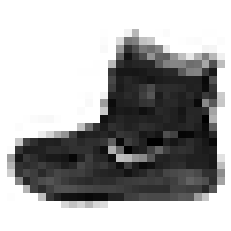

In [23]:
plt.imshow(X_train[0], cmap = 'gray_r')
plt.axis('off')

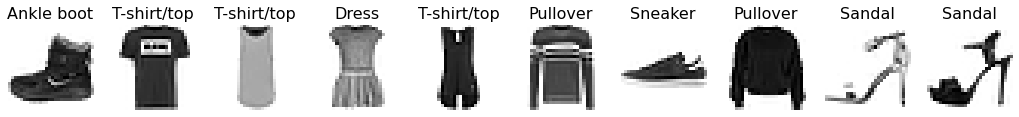

In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(class_names[y_train[i-1]], color='black', fontsize=16)
plt.show()

In [0]:
X_train = X_train / 255
X_test = X_test /255

In [26]:
print(X_train[0])

[[0.             0.             0.             0.             0.             0.             0.             0.             0.
  0.             0.             0.             0.             0.             0.             0.             0.             0.
  0.             0.             0.             0.             0.             0.             0.             0.             0.
  0.            ]
 [0.             0.             0.             0.             0.             0.             0.             0.             0.
  0.             0.             0.             0.             0.             0.             0.             0.             0.
  0.             0.             0.             0.             0.             0.             0.             0.             0.
  0.            ]
 [0.             0.             0.             0.             0.             0.             0.             0.             0.
  0.             0.             0.             0.             0.             0.          

In [27]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

Using TensorFlow backend.


Budowa modelu

In [28]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5244 - accuracy: 0.8136 - val_loss: 0.4102 - val_accuracy: 0.8521
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3862 - accuracy: 0.8616 - val_loss: 0.4661 - val_accuracy: 0.8266
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3532 - accuracy: 0.8731 - val_loss: 0.3565 - val_accuracy: 0.8769
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3320 - accuracy: 0.8811 - val_loss: 0.3777 - val_accuracy: 0.8696
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3174 - accuracy: 0.8873 - val_loss: 0.3811 - val_accuracy: 0.8741
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3073 - accuracy: 0.8919 - val_loss: 0.3638 - val_accuracy: 0.8780
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2959 - accuracy: 0.8945 - val_loss: 0.3690 - val_accuracy:

In [30]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.524394,0.813625,0.410241,0.852083,0
1,0.386199,0.861625,0.466140,0.826583,1
2,0.353236,0.873146,0.356456,0.876917,2
3,0.331963,0.881104,0.377728,0.869583,3
4,0.317379,0.887292,0.381097,0.874083,4
5,0.307263,0.891917,0.363830,0.878000,5
6,0.295876,0.894500,0.368994,0.881750,6
7,0.285820,0.900354,0.373316,0.884167,7
8,0.281868,0.901125,0.370139,0.884833,8
9,0.275742,0.904167,0.389841,0.886500,9


In [31]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')
fig.show()

In [32]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose = 0)
print(test_acc)

0.8773000240325928


In [33]:
predictions = model.predict(X_test)
predictions

array([[0.000000000543, 0.            , 0.000000000007, ..., 0.009664233   , 0.000000039229, 0.9898217     ],
       [0.000000149486, 0.            , 0.9992393     , ..., 0.            , 0.000000000002, 0.000000000001],
       [0.            , 1.            , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.000004022   , 0.            , 0.000000002374, ..., 0.            , 0.9999958     , 0.            ],
       [0.000000000001, 0.99999964    , 0.            , ..., 0.            , 0.            , 0.            ],
       [0.000000001322, 0.000000000086, 0.000000027108, ..., 0.0037883746  , 0.000021147333, 0.00006601836 ]], dtype=float32)

In [34]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000514,0.000000,0.009664,0.000000,0.989822
1,0.000000,0.000000,0.999239,0.000000,0.000695,0.000000,0.000065,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.197423,0.000000,0.011328,0.000685,0.002971,0.000000,0.787576,0.000000,0.000017,0.000001


In [35]:
predictions_cls = model.predict_classes(X_test)
predictions_cls

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, ..., 8, 1, 5])

In [38]:
idx = 3775 #@param {type: 'slider', min:0, max:10000}

if predictions_cls[idx] == y_test[idx]:
    color = 'green'
else:
    color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y=predictions_df.iloc[idx], orientation='v', 
                     marker_color=color))
fig.update_layout(width=600, height=300,
                  title=f'Predykcja: {class_names[predictions_cls[idx]]}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

In [39]:
misclassified = []
for idx, _ in enumerate(X_test):
    if predictions_cls[idx] != y_test[idx]:
        misclassified.append(idx)

index_mapper = {}


for idx, idx_real in enumerate(misclassified):
    index_mapper[idx] = idx_real

idx = 421 #@param {type: 'slider', min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, 
                     y=predictions_df.iloc[index_mapper[idx]], 
                     orientation='v', 
                     marker_color='red'))

fig.update_layout(width=600, height=300,
                  title=(f' Etykieta: {class_names[y_test[index_mapper[idx]]]}'
                      f' ~ Predykcja: {class_names[predictions_cls[index_mapper[idx]]]}'))
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[index_mapper[idx]] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)


Klika możliwości poprawy modeli:

zwiększenie liczby epok

zwiększenie/zmniejszenie parametrów uczenia, stronjenie hiperparametrów

zwiększenie/zmniejszenie liczby neuronów wewnątrz wartsw uktytych

zwiększenie/zmniejszenie parametru batch_size, czyli rozmiaru wsadu

zwiększenie/zmniejszenie liczby warstw ukrytych

zastosowanie regularyzacji (L1 - lasso, L2 - ridge), warstwy Dropout
